In [2]:
!pip install kaggle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir ~/.kaggle

In [6]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download cifar-10-python

403 - Forbidden - Permission 'datasets.get' was denied


In [10]:
!kaggle datasets download -d pankrzysiu/cifar10-python

Dataset URL: https://www.kaggle.com/datasets/pankrzysiu/cifar10-python
License(s): other
 99% 323M/325M [00:06<00:00, 38.9MB/s]
100% 325M/325M [00:06<00:00, 53.8MB/s]


In [11]:
!unzip cifar10-python.zip

Archive:  cifar10-python.zip
  inflating: cifar-10-batches-py/batches.meta  
  inflating: cifar-10-batches-py/data_batch_1  
  inflating: cifar-10-batches-py/data_batch_2  
  inflating: cifar-10-batches-py/data_batch_3  
  inflating: cifar-10-batches-py/data_batch_4  
  inflating: cifar-10-batches-py/data_batch_5  
  inflating: cifar-10-batches-py/readme.html  
  inflating: cifar-10-batches-py/test_batch  
  inflating: cifar-10-python.tar.gz  


In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import keras
from keras.datasets import cifar10
import pandas as pd
import numpy as np
from PIL import Image
import os
import warnings
warnings.filterwarnings('ignore')

In [16]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [23]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 1)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


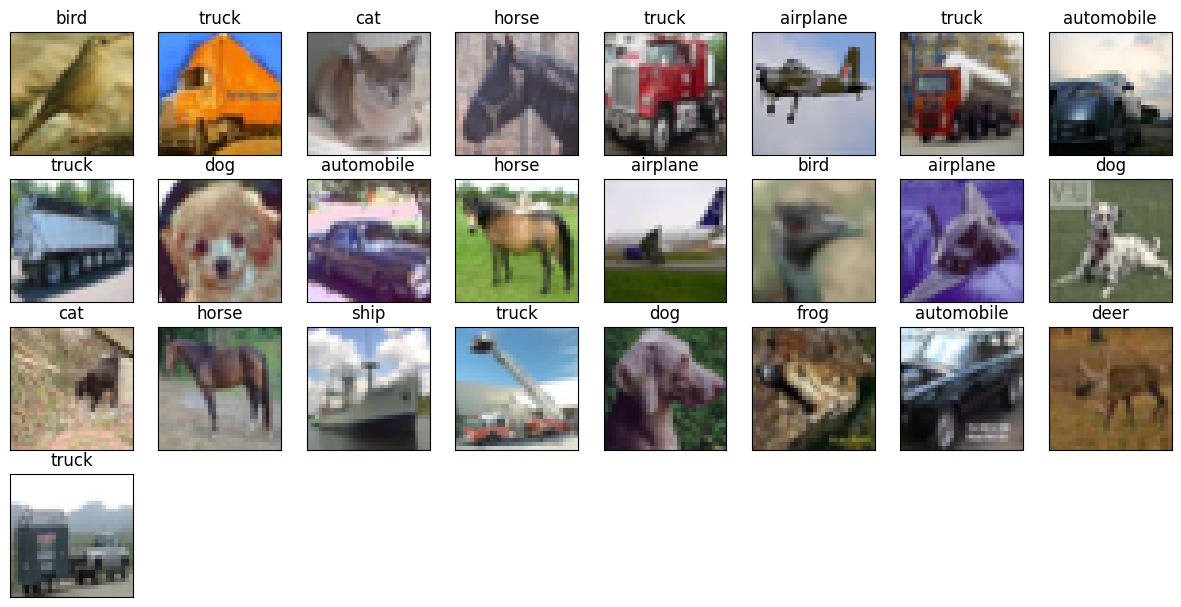

In [26]:
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(25):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

In [29]:
# Convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
mean = np.mean(X_train)
std  = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train-mean)/(std+1e-7)
X_test  = (X_test-mean) /(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)

from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

In [35]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

In [36]:
print(y_test)

[[[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]]


In [31]:

num_classes = 10
model = keras.models.Sequential([
    # Adding first convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(32, 32, 3), name='Conv_1'),
    # Normalizing the parameters from last layer to speed up the performance (optional)
    keras.layers.BatchNormalization(name='BN_1'),
    # Adding first pooling layer
    keras.layers.MaxPool2D(pool_size=(2, 2), name='MaxPool_1'),
    # Adding second convolutional layer
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001), name='Conv_2'),
    keras.layers.BatchNormalization(name='BN_2'),
    # Adding second pooling layer
    keras.layers.MaxPool2D(pool_size=(2, 2), name='MaxPool_2'),
    # Flattens the input
    keras.layers.Flatten(name='Flat'),
    # Fully-Connected layer
    keras.layers.Dense(num_classes, activation='softmax', name='pred_layer')
])

In [32]:
model.summary(
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1 (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 BN_1 (BatchNormalization)   (None, 32, 32, 32)        128       
                                                                 
 MaxPool_1 (MaxPooling2D)    (None, 16, 16, 32)        0         
                                                                 
 Conv_2 (Conv2D)             (None, 16, 16, 64)        18496     
                                                                 
 BN_2 (BatchNormalization)   (None, 16, 16, 64)        256       
                                                                 
 MaxPool_2 (MaxPooling2D)    (None, 8, 8, 64)          0         
                                                                 
 Flat (Flatten)              (None, 4096)              0

In [33]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cpfile = r'CIFAR10_checkpoint.hdf5' # Weights to be stored in HDF5 format
cb_checkpoint = keras.callbacks.ModelCheckpoint(cpfile, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
epochs = 5
model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[cb_checkpoint])


Epoch 1/5
1125/1125 [==============================] - ETA: 0s - loss: 1.6305 - accuracy: 0.5061

1125/1125 [==============================] - 95s 84ms/step - loss: 1.6305 - accuracy: 0.5061 - val_loss: 1.2711 - val_accuracy: 0.5976
Epoch 2/5
1125/1125 [==============================] - ETA: 0s - loss: 1.1254 - accuracy: 0.6352

1125/1125 [==============================] - 85s 76ms/step - loss: 1.1254 - accuracy: 0.6352 - val_loss: 1.1232 - val_accuracy: 0.6367
Epoch 3/5
1125/1125 [==============================] - ETA: 0s - loss: 0.9560 - accuracy: 0.6904

1125/1125 [==============================] - 91s 81ms/step - loss: 0.9560 - accuracy: 0.6904 - val_loss: 1.0878 - val_accuracy: 0.6517
Epoch 4/5
1125/1125 [==============================] - ETA: 0s - loss: 0.8640 - accuracy: 0.7217

1125/1125 [==============================] - 90s 80ms/step - loss: 0.8640 - accuracy: 0.7217 - val_loss: 1.0541 - val_accuracy: 0.6686
Epoch 5/5
1125/1125 [==============================] - ETA: 0s - loss: 0.8045 - accuracy: 0.7423

1125/1125 [==============================] - 87s 78ms/step - loss: 0.8045 - accuracy: 0.7423 - val_loss: 1.0783 - val_accuracy: 0.6708


In [52]:
pred = model.predict(X_test)

313/313 [==============================] - 6s 20ms/step


In [53]:

pred = [class_names[np.argmax(i)] for i in pred]
y_test = [class_names[np.argmax(i)] for i in y_test]
data = pd.DataFrame([pred,y_test]).T
data.columns = ['Predicted',"Actual"]
data

,Predicted,Actual
0,cat,airplane
1,automobile,airplane
2,airplane,airplane
3,ship,airplane
4,frog,airplane
...,...,...
9995,dog,airplane
9996,frog,airplane
9997,dog,airplane
9998,automobile,airplane


In [55]:
print(pred,y_test)

['cat', 'automobile', 'airplane', 'ship', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'bird', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog', 'horse', 'airplane', 'deer', 'truck', 'deer', 'frog', 'deer', 'bird', 'truck', 'frog', 'frog', 'bird', 'bird', 'cat', 'truck', 'frog', 'deer', 'truck', 'truck', 'dog', 'deer', 'frog', 'dog', 'frog', 'airplane', 'truck', 'cat', 'truck', 'horse', 'bird', 'truck', 'ship', 'frog', 'frog', 'ship', 'ship', 'horse', 'ship', 'deer', 'cat', 'horse', 'dog', 'frog', 'airplane', 'frog', 'bird', 'automobile', 'bird', 'dog', 'airplane', 'bird', 'frog', 'ship', 'ship', 'truck', 'bird', 'truck', 'cat', 'bird', 'ship', 'ship', 'automobile', 'automobile', 'horse', 'bird', 'horse', 'bird', 'bird', 'ship', 'truck', 'airplane', 'bird', 'ship', 'frog', 'deer', 'frog', 'frog', 'airplane', 'airplane', 'horse', 'deer', 'dog', 'frog', 'cat', 'automobile', 'automobile', 'frog', 'frog', 'ship', 'horse', 'deer', 'airplane', 'bird

1/1 [==============================] - 0s 23ms/step


Text(0.5, 1.0, '\n\nPredicted Answer is : horse \n')

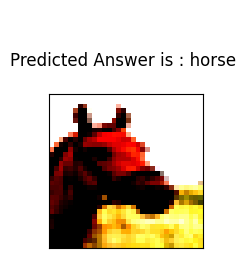

In [77]:
testno = 99
res = model.predict(X_test[testno].reshape(1,32,32,3))
title = class_names[np.argmax(res)]

plt.figure(figsize=(2,2))
plt.imshow(X_test[testno])
plt.xticks([])
plt.yticks([])
plt.title(f'\n\nPredicted Answer is : {title} \n')
